# Лабораторная работа №1
## Персептроны. Процедура обучения Розенблатта

Целью работы является исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Вспомогательные функции

In [2]:
def make_xy(x, y):
    n = len(x)
    res = []
    for i in range(n):
        elem = (x[i], y[i])
        res.append(elem)
    return res

In [3]:
colour = ["-b", "-c"]

def draw_data(xy, labels, ncls, w = None, b = None, hist = None):
    n = len(xy)
    min_x = xy[0][0]
    max_x = xy[0][0]
    mpx, mpy = dict(), dict()
    for elem in labels:
        mpx[elem] = []
        mpy[elem] = []
    for i in range(n):
        [x0, y0] = xy[i]
        min_x = min(x0, min_x)
        max_x = max(x0, max_x)
        mpx[labels[i]].append(x0)
        mpy[labels[i]].append(y0)
    for i in mpx.keys():
        plt.scatter(mpx[i], mpy[i])
    if (w is not None):
        for i in range(w.shape[1]):
            line_x = np.linspace(min_x, max_x, 100)
            line_y = -(w[0][i] * line_x + b[i]) / w[1][i]
            plt.plot(line_x, line_y, colour[i])
    plt.show()
    if (hist is not None):
        plt.plot(hist)
        plt.ylabel("mae")
        plt.xlabel("Эпохи")
        plt.show()

### Вариант 4

### Задание 1

In [4]:
x = [-4, -3.4, 0.7, 4.3, 2.3, 3.6]
y = [-3.6, 1.2, -4.5, 2.2, -4.4, 4.3]
labels = [0, 1, 0, 0, 0, 1]

Визуализация данных

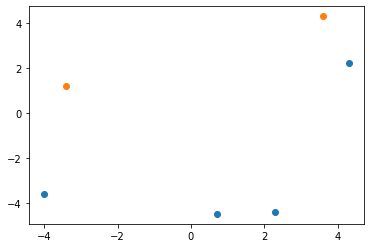

In [5]:
xy = make_xy(x, y)
draw_data(xy, labels, 2)

Обучение модели

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim = 2, activation = "sigmoid")
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
    loss = "mse",
    metrics = ["mae"]
)

h = model.fit(x = xy, y = labels, batch_size = 1, epochs = 20, verbose = 0)

w = model.get_weights()[0]
b = model.get_weights()[1]

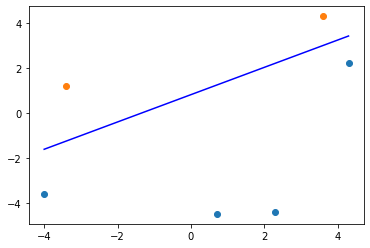

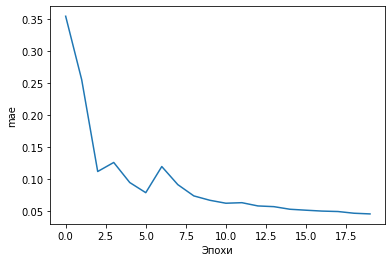

In [7]:
draw_data(xy, labels, 2, w, b, h.history["mae"])

### Задание 2

In [8]:
x = [4.3, -2.5, 0.9, 1.1, 0.3, -0.5, 4.6, 1.9]
y = [-3.1, 3.9, 0, 3.1, -3, -0.8, 1.2, 2.2]
labels = [(0, 0), (1, 1), (0, 1), (0, 1), (1, 0), (1, 1), (0, 0), (0, 1)]

Визуализация данных

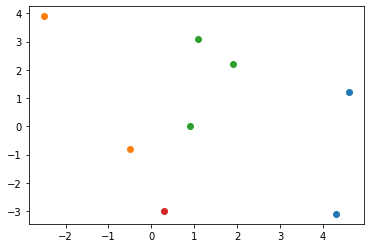

In [9]:
xy = make_xy(x, y)
draw_data(xy, labels, 4)

Обучение модели

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, input_dim = 2, activation = "sigmoid")
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
    loss = "mse",
    metrics = ["mae"]
)

h = model.fit(x = xy, y = labels, batch_size = 1, epochs = 20, verbose = 0)

w = model.get_weights()[0]
b = model.get_weights()[1]

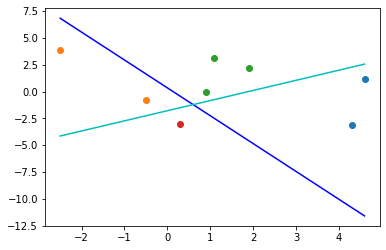

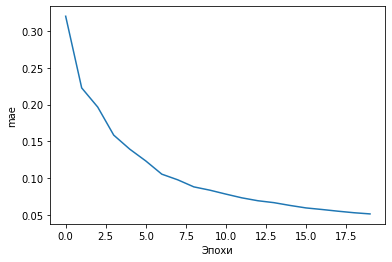

In [11]:
draw_data(xy, labels, 4, w, b, h.history["mae"])

### Вывод

В ходе выполнения лабораторной работы я вспомнил основы использования библиотеки Tensorflow и Keras, реализовал однослойный персептрон. Данные получились линейно разделимыми.